In [429]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import plotly.express as px
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("preprocessing_data.csv")

print(df.head())

   STT Tên Quốc Gia            Thủ Đô  Diện Tích Lãnh Thổ (km²)  Tổng Dân Số  \
0    1  Afghanistan             Kabul                    652230     40578842   
1    2      Albania            Tirana                     27400      2777689   
2    3      Algeria           Algiers                   2381741     45477389   
3    4      Andorra  Andorra la Vella                       470        79705   
4    5       Angola            Luanda                   1246700     35635029   

   Mật Độ Dân Số (người/km²)  Tuổi Thọ Trung Bình  Tỷ Lệ Biết Chữ (%)  \
0                         62                   63               0.373   
1                        101                   77               0.990   
2                         19                   77               0.814   
3                        170                    0               1.000   
4                         29                   62               0.720   

   Tỷ Lệ Đô Thị Hoá (%)  GDP (triệu tỷ USD)  \
0                 0.266          

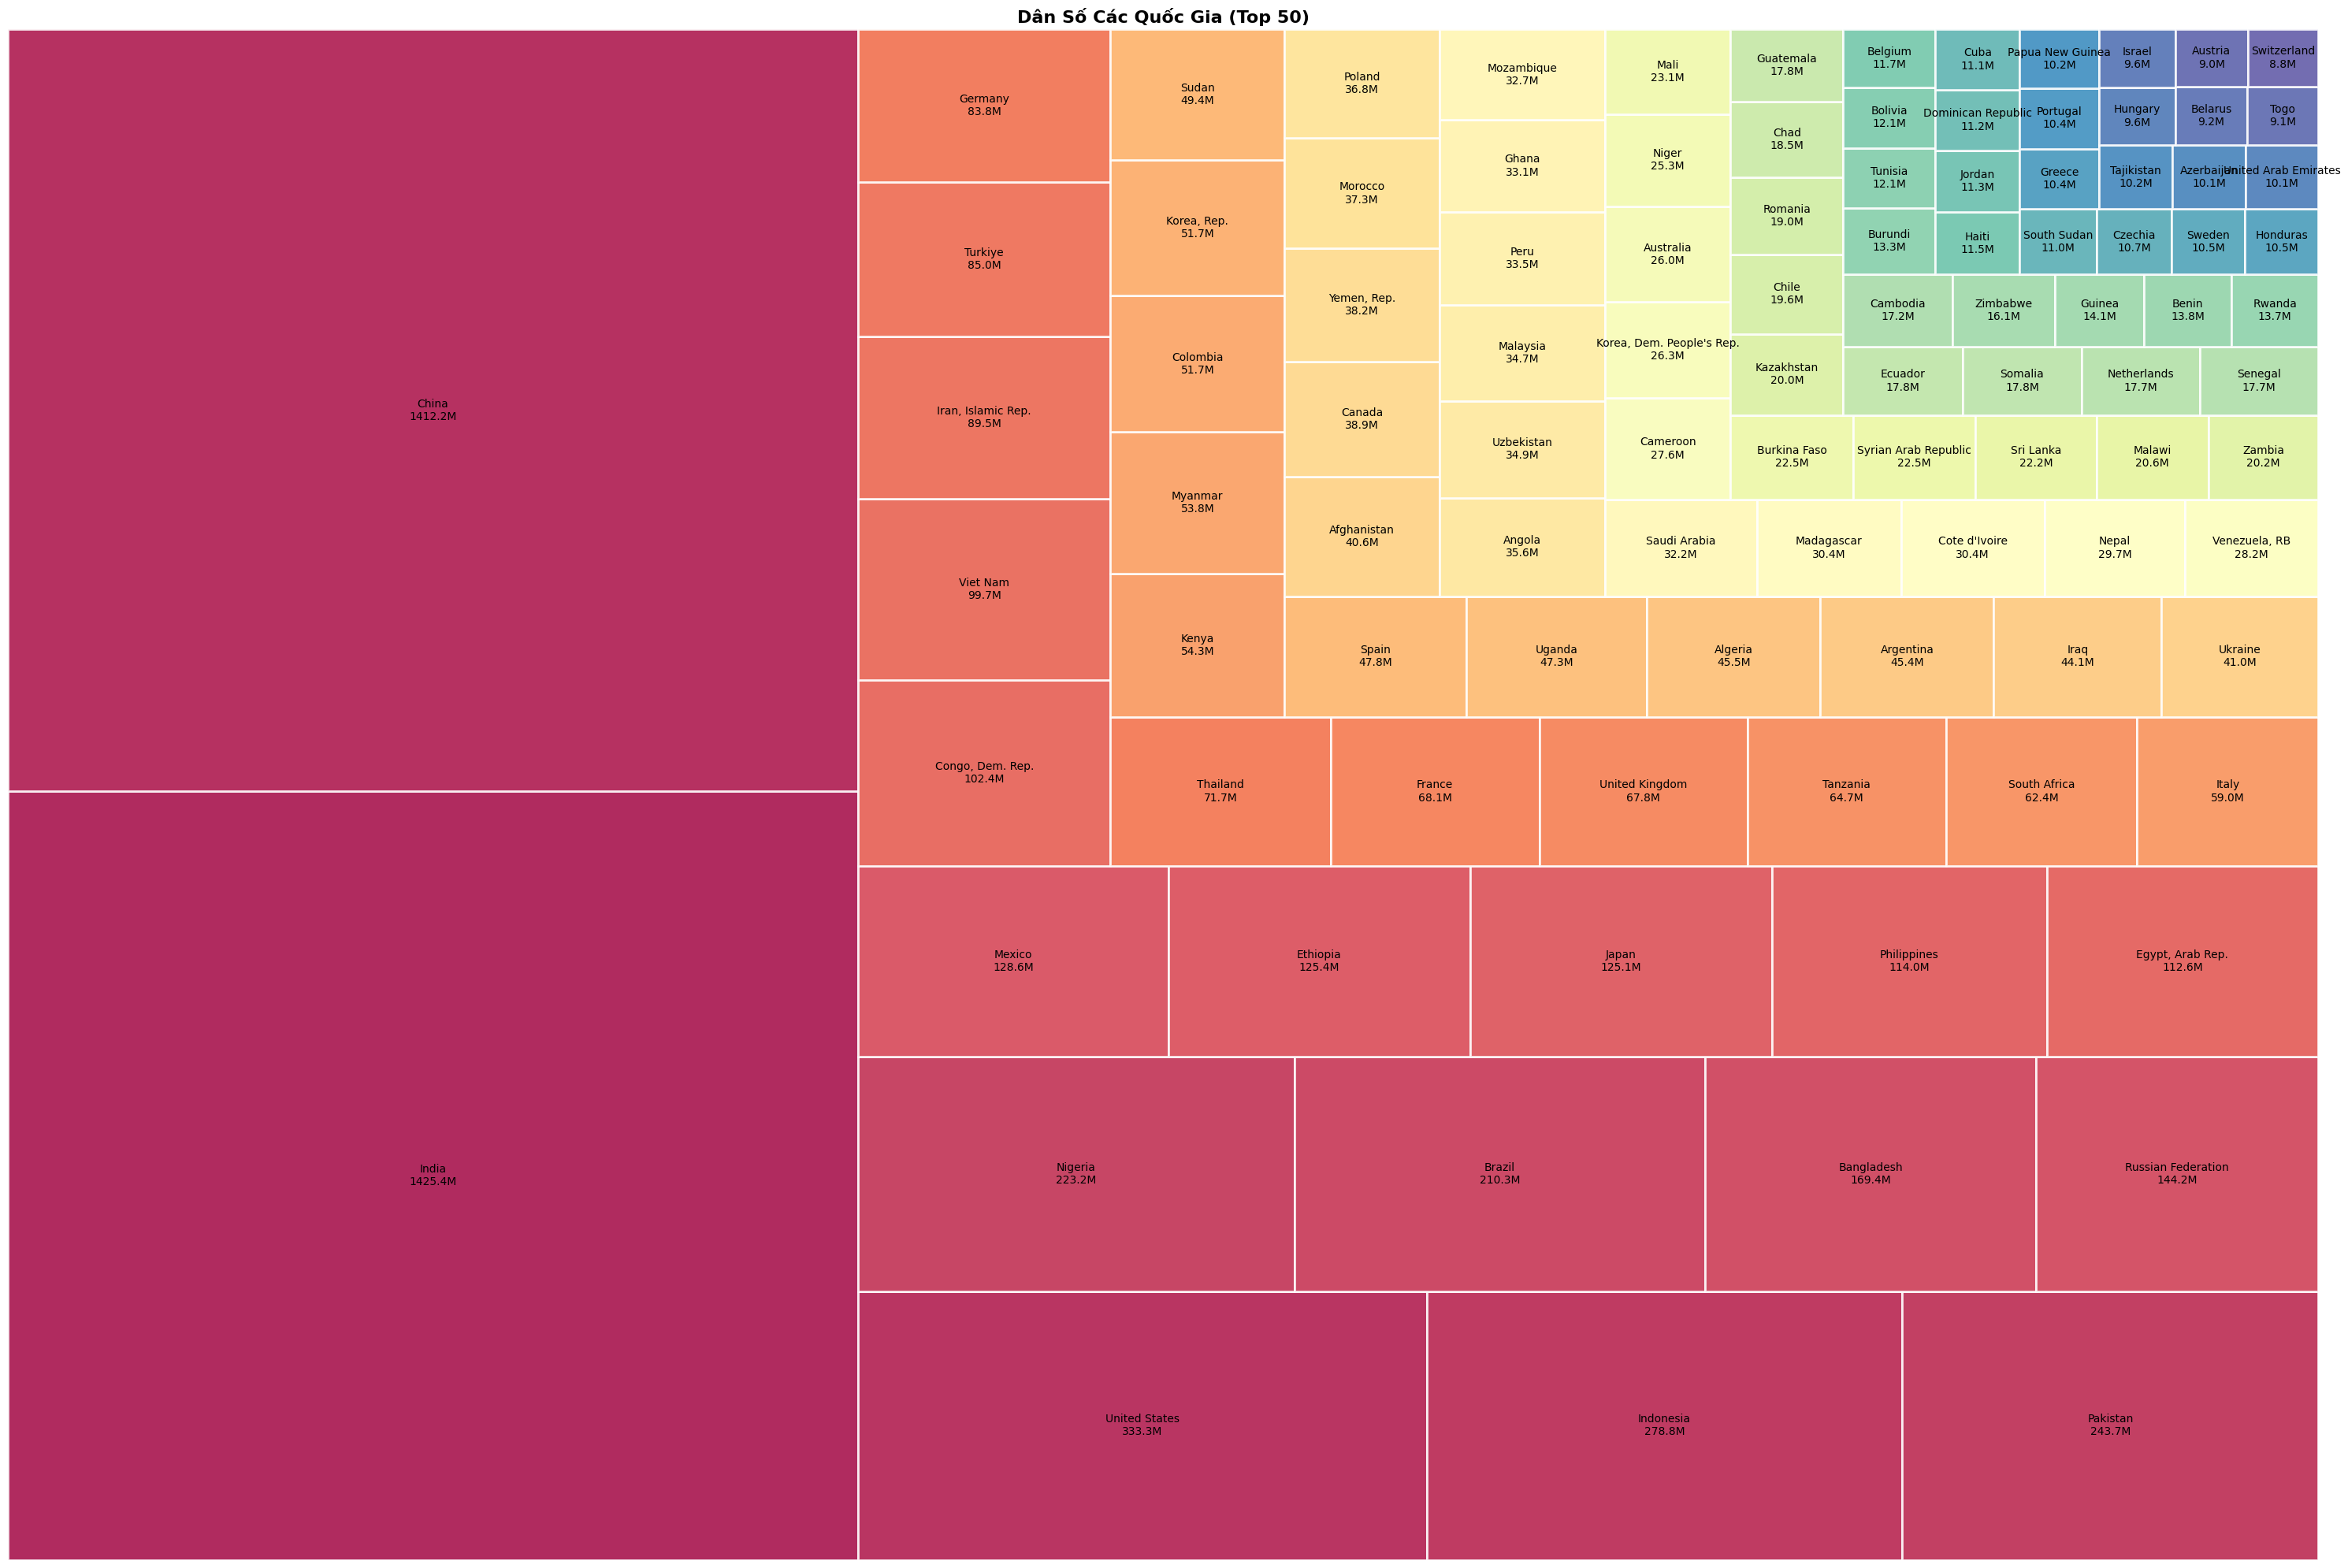

In [430]:
df["Tổng Dân Số"] = pd.to_numeric(df["Tổng Dân Số"], errors="coerce")
df_treemap = df.dropna(subset=["Tổng Dân Số"])

df_treemap = df_treemap.sort_values(by="Tổng Dân Số", ascending=False).head(100)
sizes = df_treemap["Tổng Dân Số"]
labels = df_treemap["Tên Quốc Gia"] + "\n" + (df_treemap["Tổng Dân Số"] / 1e6).round(1).astype(str) + "M"

plt.figure(figsize=(30, 20))
squarify.plot(
    sizes=sizes,
    label=labels,
    color=sns.color_palette("Spectral", len(sizes)),
    alpha=0.85,
    edgecolor='white',
    linewidth=2,
    
)

plt.title("Dân Số Các Quốc Gia (Top 50)", fontsize=16, weight='bold')
plt.axis("off")  
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\3526767894.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




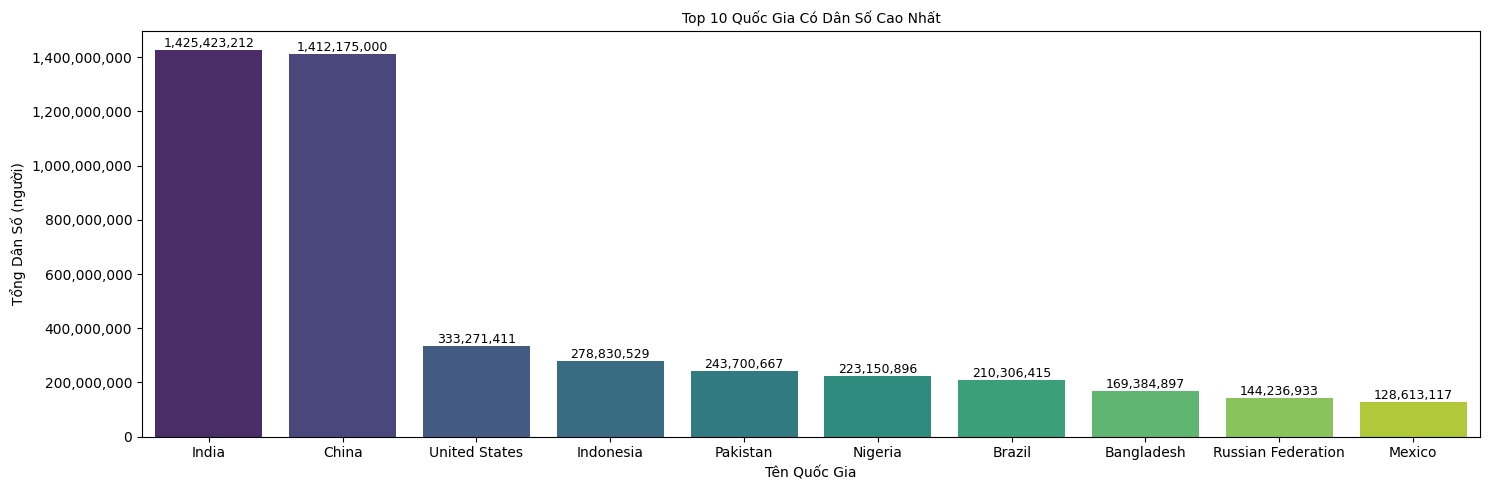

In [431]:
df["Tổng Dân Số"] = pd.to_numeric(df["Tổng Dân Số"], errors="coerce")
top10_population = df.sort_values(by="Tổng Dân Số", ascending=False).head(10)
colors = sns.color_palette("viridis", len(top10_population))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tổng Dân Số", data=top10_population, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tổng Dân Số (người)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Dân Số Cao Nhất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_population.iterrows():
    ax.text(
        x=top10_population.index.get_loc(i),
        y=row["Tổng Dân Số"],
        s=f'{int(row["Tổng Dân Số"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\1010028164.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




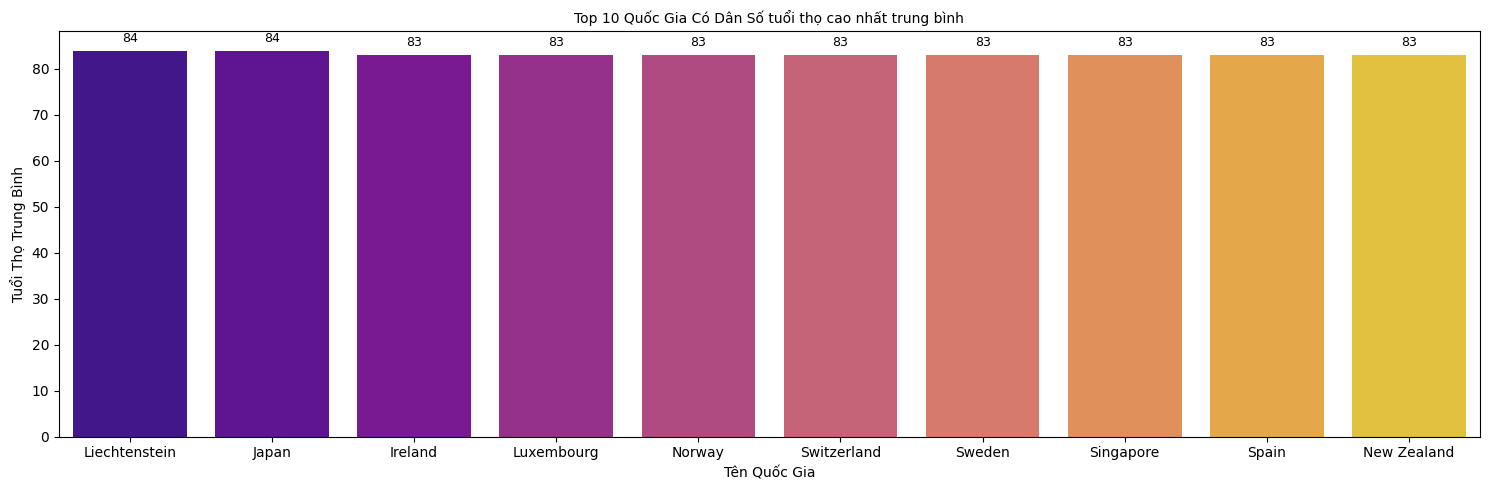

In [432]:
df["Tuổi Thọ Trung Bình"] = pd.to_numeric(df["Tuổi Thọ Trung Bình"], errors="coerce")
top10_population_age = df.sort_values(by="Tuổi Thọ Trung Bình", ascending=False).head(10)
colors = sns.color_palette("plasma", len(top10_population_age))
plt.figure(figsize=(15, 5))
barplot = sns.barplot(x="Tên Quốc Gia", y="Tuổi Thọ Trung Bình", data=top10_population_age, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tuổi Thọ Trung Bình", fontsize=10)
plt.title("Top 10 Quốc Gia Có Dân Số tuổi thọ cao nhất trung bình", fontsize=10)

for p in barplot.patches:
    barplot.annotate(f'{int(p.get_height()):,}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),             
                    textcoords='offset points',
                    fontsize=9,
                    color='black')

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\3022550825.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




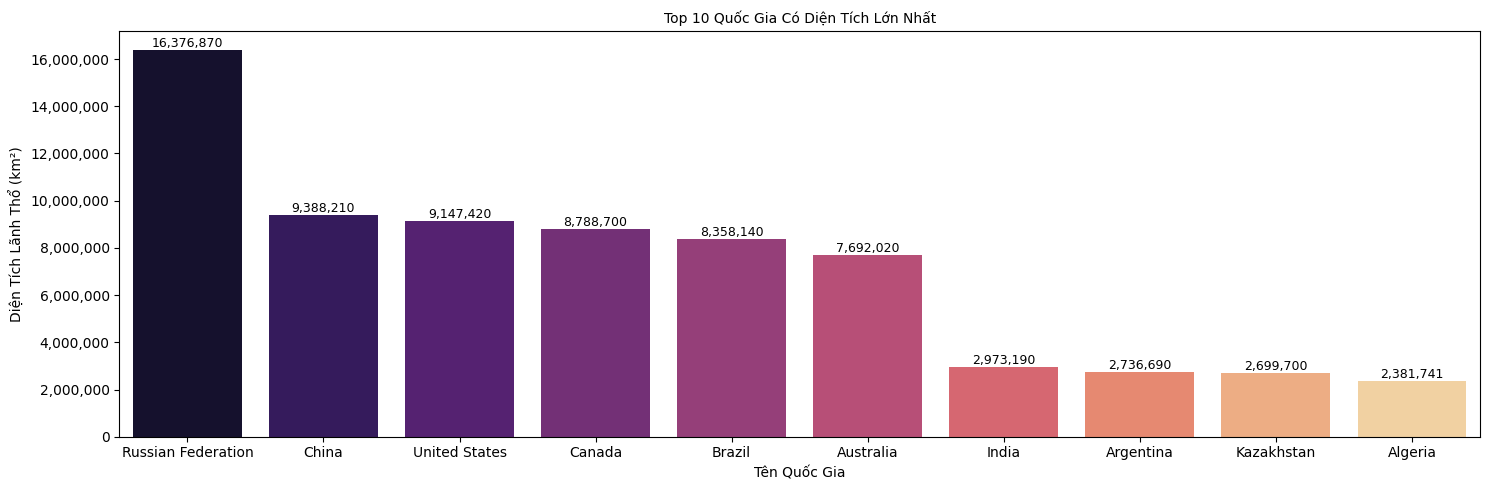

In [433]:
df["Diện Tích Lãnh Thổ (km²)"] = pd.to_numeric(df["Diện Tích Lãnh Thổ (km²)"], errors="coerce")
top10_area = df.sort_values(by="Diện Tích Lãnh Thổ (km²)", ascending=False).head(10)
colors = sns.color_palette("magma", len(top10_area))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Diện Tích Lãnh Thổ (km²)", data=top10_area, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Diện Tích Lãnh Thổ (km²)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Diện Tích Lớn Nhất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_area.iterrows():
    ax.text(
        x=top10_area.index.get_loc(i),
        y=row["Diện Tích Lãnh Thổ (km²)"],
        s=f'{int(row["Diện Tích Lãnh Thổ (km²)"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\407508030.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




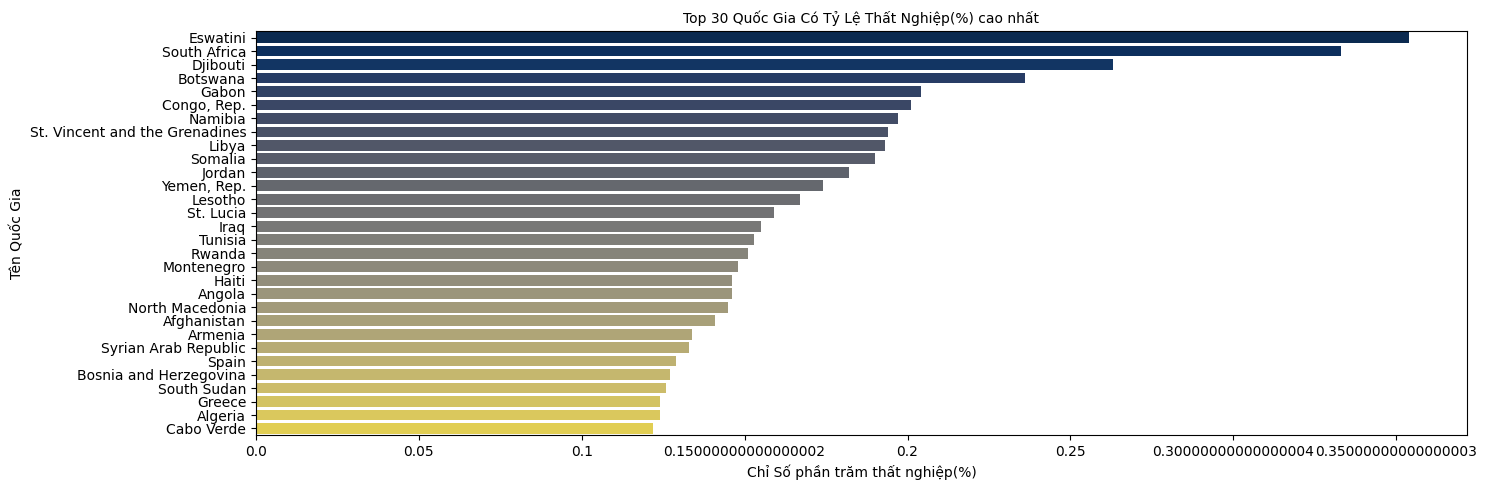

In [434]:
df["Tỷ Lệ Thất Nghiệp (%)"] = pd.to_numeric(df["Tỷ Lệ Thất Nghiệp (%)"], errors="coerce")
top30_unemployee = df.sort_values(by="Tỷ Lệ Thất Nghiệp (%)", ascending=False).head(30)
colors = sns.color_palette("cividis", len(top30_unemployee))
plt.figure(figsize=(15, 5))
sns.barplot(x="Tỷ Lệ Thất Nghiệp (%)", y="Tên Quốc Gia", data=top30_unemployee, palette=colors)
plt.xticks(rotation=0)
plt.xlabel("Chỉ Số phần trăm thất nghiệp(%)", fontsize=10)
plt.title("Top 30 Quốc Gia Có Tỷ Lệ Thất Nghiệp(%) cao nhất", fontsize=10)
formatter = FuncFormatter(lambda x, pos: f'{float(x):,}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()


C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\3399495990.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




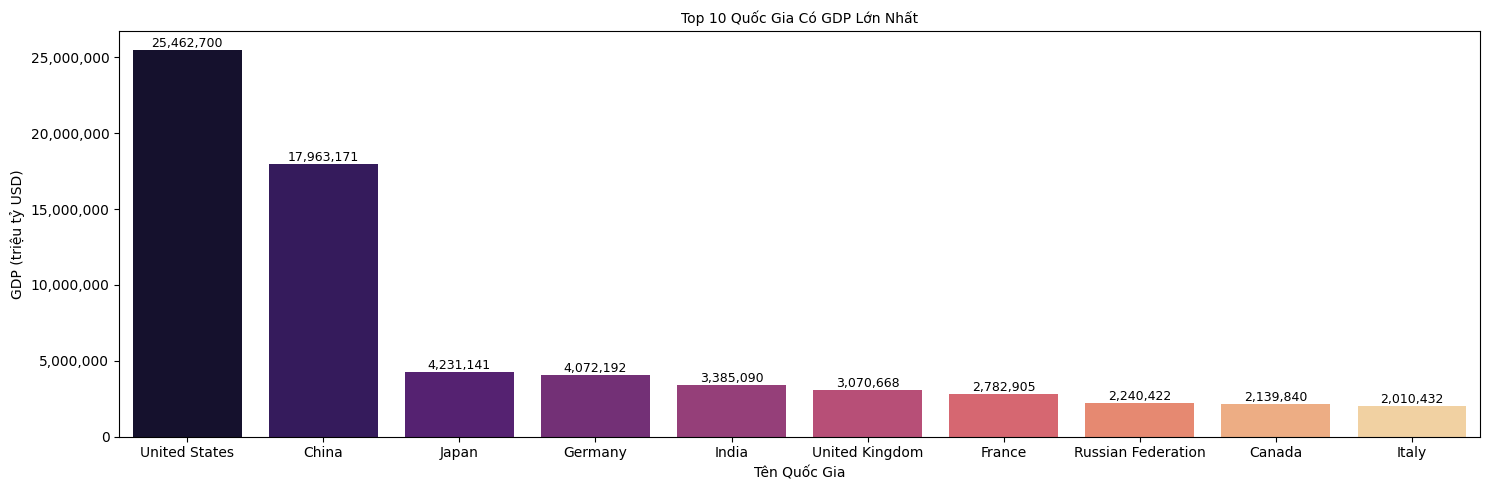

In [435]:
df["GDP (triệu tỷ USD)"] = pd.to_numeric(df["GDP (triệu tỷ USD)"], errors="coerce")
top10_gdp = df.sort_values(by="GDP (triệu tỷ USD)", ascending=False).head(10)
colors = sns.color_palette("magma", len(top10_gdp))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="GDP (triệu tỷ USD)", data=top10_gdp, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("GDP (triệu tỷ USD)", fontsize=10)
plt.title("Top 10 Quốc Gia Có GDP Lớn Nhất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_gdp.iterrows():
    ax.text(
        x=top10_gdp.index.get_loc(i),
        y=row["GDP (triệu tỷ USD)"],
        s=f'{int(row["GDP (triệu tỷ USD)"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\3380827568.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




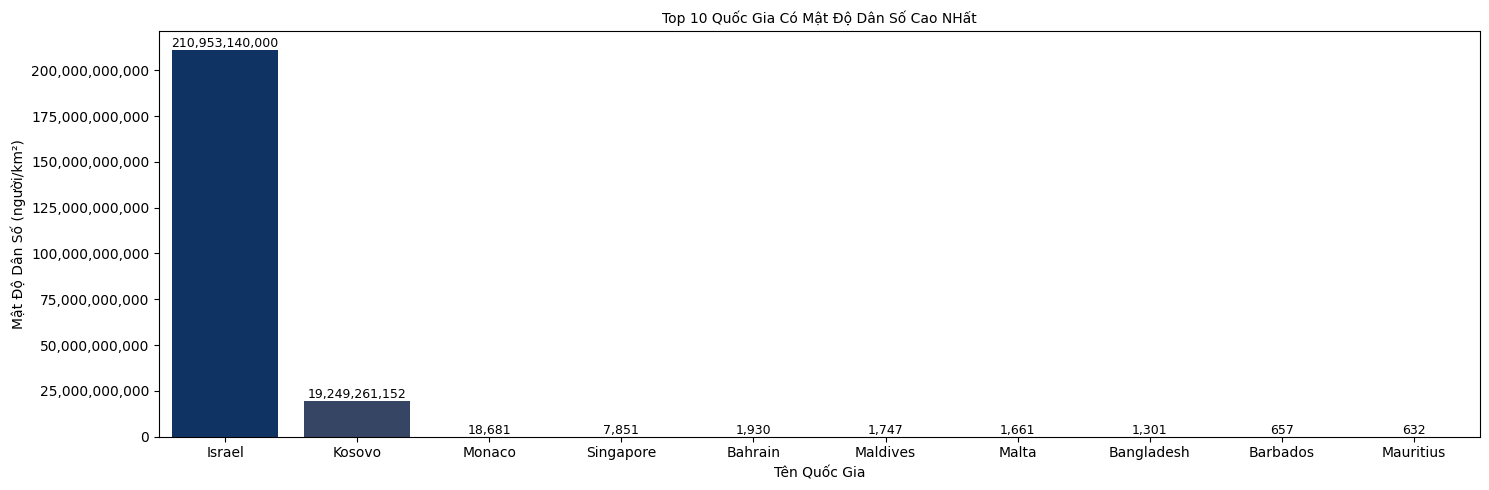

In [436]:
df["Mật Độ Dân Số (người/km²))"] = pd.to_numeric(df["Mật Độ Dân Số (người/km²)"], errors="coerce")
top10_pop_density = df.sort_values(by="Mật Độ Dân Số (người/km²)", ascending=False).head(10)
colors = sns.color_palette("cividis", len(top10_pop_density))

plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Mật Độ Dân Số (người/km²)", data=top10_pop_density, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Mật Độ Dân Số (người/km²)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Mật Độ Dân Số Cao NHất", fontsize=10)

# Hiển thị con số trên cột
for i, row in top10_pop_density.iterrows():
    ax.text(
        x=top10_pop_density.index.get_loc(i),
        y=row["Mật Độ Dân Số (người/km²))"],
        s=f'{int(row["Mật Độ Dân Số (người/km²)"]):,}',
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )

formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\2475151933.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




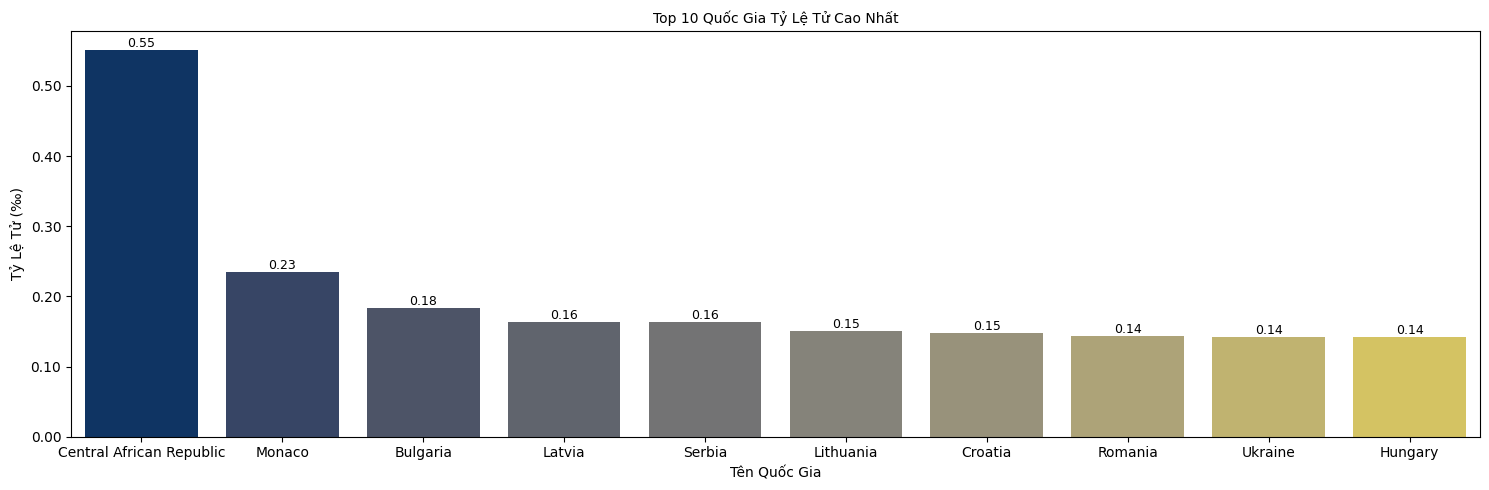

In [437]:
df["Tỷ Lệ Tử (‰)"] = pd.to_numeric(df["Tỷ Lệ Tử (‰)"], errors="coerce")
top10_death_Per = df.sort_values(by="Tỷ Lệ Tử (‰)", ascending=False).head(10)
colors = sns.color_palette("cividis", len(top10_death_Per))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tỷ Lệ Tử (‰)", data=top10_death_Per, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tỷ Lệ Tử (‰)", fontsize=10)
plt.title("Top 10 Quốc Gia Tỷ Lệ Tử Cao Nhất", fontsize=10)

for i, row in top10_death_Per.iterrows():
    ax.text(
        x=top10_death_Per.index.get_loc(i),
        y=row["Tỷ Lệ Tử (‰)"],
        s=f'{row["Tỷ Lệ Tử (‰)"]:.2f}',  
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\3645153793.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




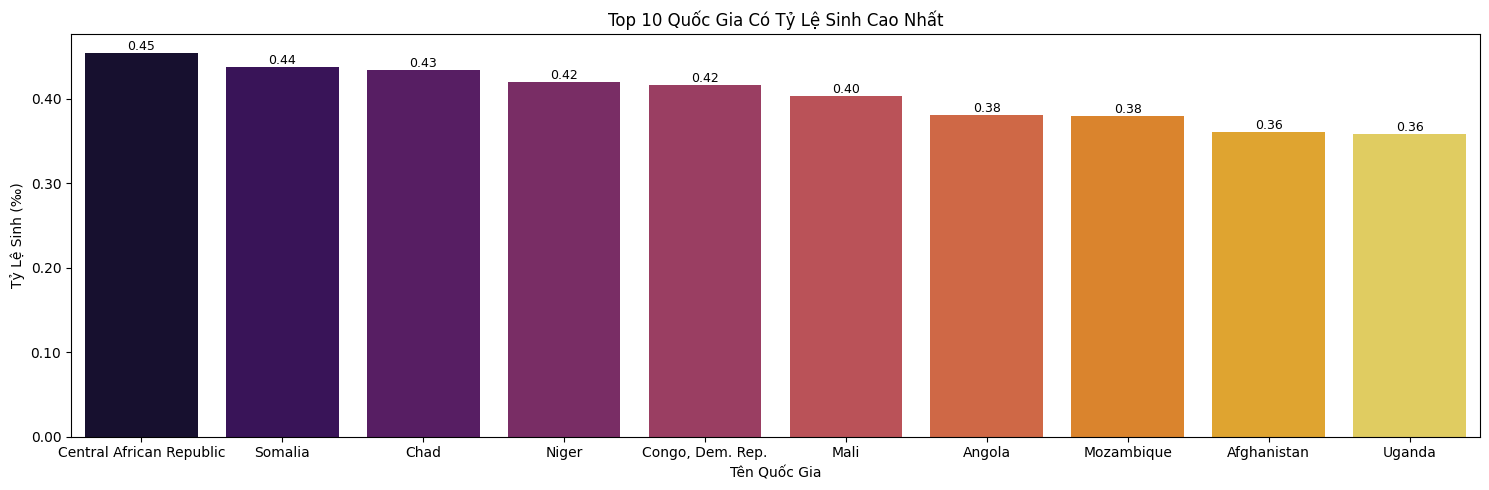

In [438]:
df["Tỷ Lệ Sinh (‰)"] = pd.to_numeric(df["Tỷ Lệ Sinh (‰)"], errors="coerce")
top10_live_Per = df.sort_values(by="Tỷ Lệ Sinh (‰)", ascending=False).head(10)
colors = sns.color_palette("inferno", len(top10_live_Per))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tỷ Lệ Sinh (‰)", data=top10_live_Per, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tỷ Lệ Sinh (‰)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Tỷ Lệ Sinh Cao Nhất", fontsize=12)
for idx, row in top10_live_Per.iterrows():
    ax.text(
        x=top10_live_Per.index.get_loc(idx), 
        y=row["Tỷ Lệ Sinh (‰)"],   
        s=f'{row["Tỷ Lệ Sinh (‰)"]:.2f}',      
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\1629031177.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




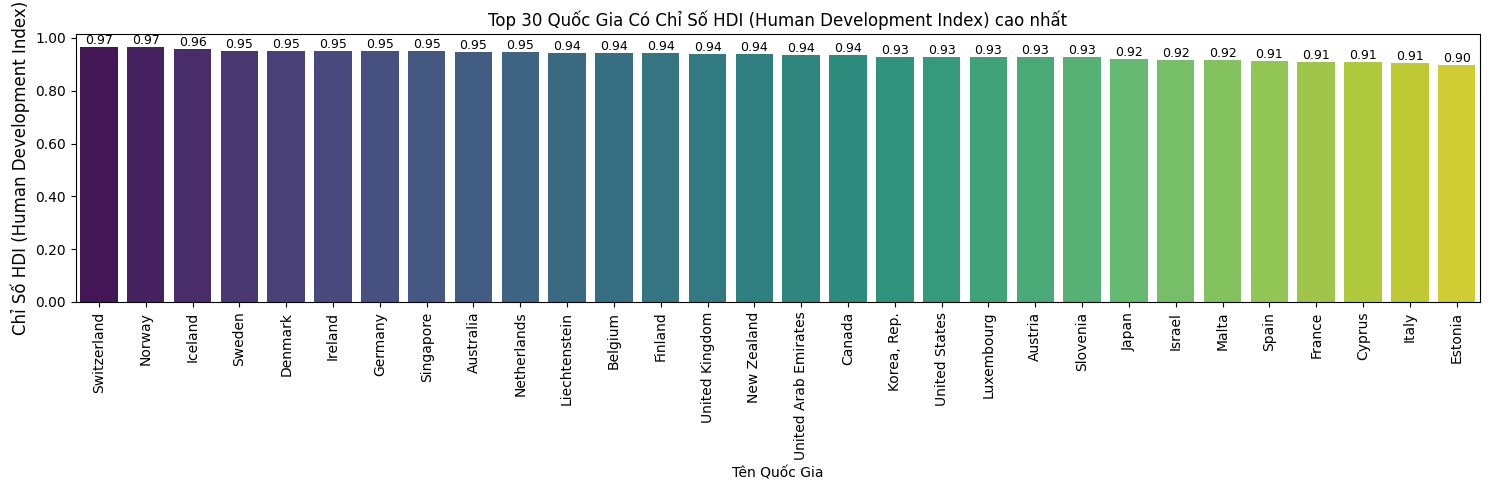

In [439]:
df["Chỉ Số HDI (Human Development Index)"] = pd.to_numeric(df["Chỉ Số HDI (Human Development Index)"], errors="coerce")
top30_HDI = df.sort_values(by="Chỉ Số HDI (Human Development Index)", ascending=False).head(30)
colors = sns.color_palette("viridis", len(top30_HDI))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Chỉ Số HDI (Human Development Index)", data=top30_HDI, palette=colors)
plt.xticks(rotation=90)
plt.ylabel("Chỉ Số HDI (Human Development Index)", fontsize=12)
plt.title("Top 30 Quốc Gia Có Chỉ Số HDI (Human Development Index) cao nhất", fontsize=12)
for idx, row in top30_HDI.iterrows():
    ax.text(
        x=top30_HDI.index.get_loc(idx), 
        y=row["Chỉ Số HDI (Human Development Index)"],   
        s=f'{row["Chỉ Số HDI (Human Development Index)"]:.2f}',      
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\1013302747.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




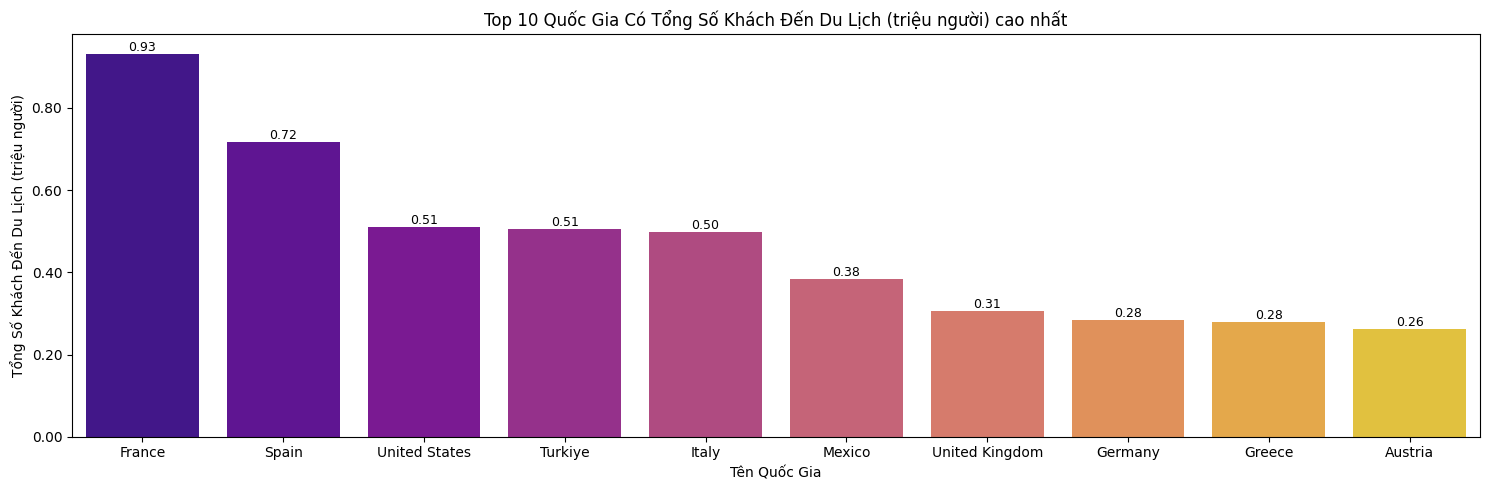

In [440]:
df["Tổng Số Khách Đến Du Lịch (triệu người)"] = pd.to_numeric(df["Tổng Số Khách Đến Du Lịch (triệu người)"], errors="coerce")
top10_total_tourist = df.sort_values(by="Tổng Số Khách Đến Du Lịch (triệu người)", ascending=False).head(10)
colors = sns.color_palette("plasma", len(top10_total_tourist))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tổng Số Khách Đến Du Lịch (triệu người)", data=top10_total_tourist, palette=colors)
plt.xticks(rotation=0)
plt.ylabel("Tổng Số Khách Đến Du Lịch (triệu người)", fontsize=10)
plt.title("Top 10 Quốc Gia Có Tổng Số Khách Đến Du Lịch (triệu người) cao nhất", fontsize=12)
for idx, row in top10_total_tourist.iterrows():
    ax.text(
        x=top10_total_tourist.index.get_loc(idx), 
        y=row["Tổng Số Khách Đến Du Lịch (triệu người)"],   
        s=f'{row["Tổng Số Khách Đến Du Lịch (triệu người)"]:.2f}',      
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\3885120824.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




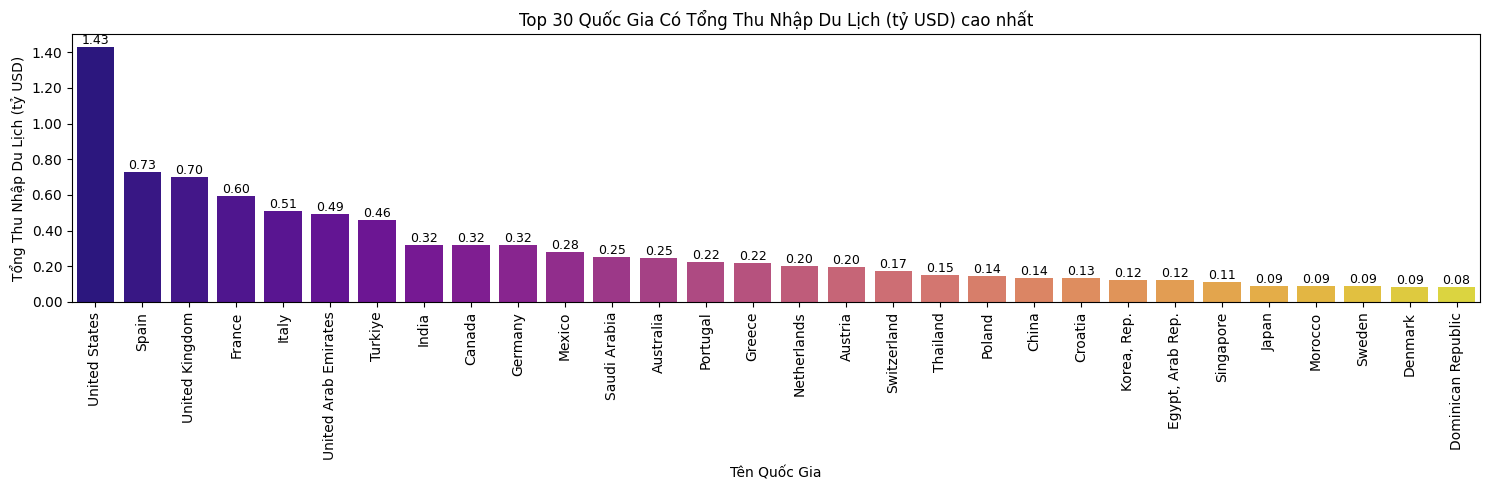

In [441]:
df["Tổng Thu Nhập Du Lịch (tỷ USD)"] = pd.to_numeric(df["Tổng Thu Nhập Du Lịch (tỷ USD)"], errors="coerce")
top30_total_tourist_profit = df.sort_values(by="Tổng Thu Nhập Du Lịch (tỷ USD)", ascending=False).head(30)
colors = sns.color_palette("plasma", len(top30_total_tourist_profit))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Tổng Thu Nhập Du Lịch (tỷ USD)", data=top30_total_tourist_profit, palette=colors)
plt.xticks(rotation=90)
plt.ylabel("Tổng Thu Nhập Du Lịch (tỷ USD)", fontsize=10)
plt.title("Top 30 Quốc Gia Có Tổng Thu Nhập Du Lịch (tỷ USD) cao nhất", fontsize=12)
for idx, row in top30_total_tourist_profit.iterrows():
    ax.text(
        x=top30_total_tourist_profit.index.get_loc(idx), 
        y=row["Tổng Thu Nhập Du Lịch (tỷ USD)"],   
        s=f'{row["Tổng Thu Nhập Du Lịch (tỷ USD)"]:.2f}',      
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

C:\Users\nguye\AppData\Local\Temp\ipykernel_12444\3426741691.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




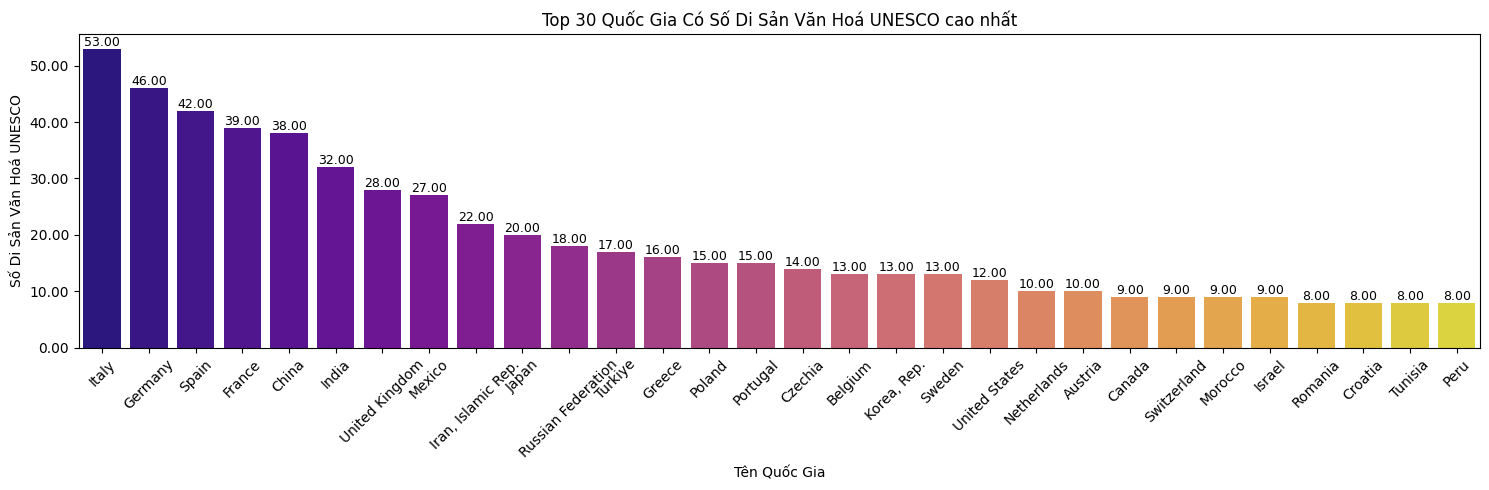

In [442]:
df["Số Di Sản Văn Hoá UNESCO"] = pd.to_numeric(df["Số Di Sản Văn Hoá UNESCO"], errors="coerce")
top20_UNESCO = df.sort_values(by="Số Di Sản Văn Hoá UNESCO", ascending=False).head(30)
colors = sns.color_palette("plasma", len(top20_UNESCO))
plt.figure(figsize=(15, 5))
ax = sns.barplot(x="Tên Quốc Gia", y="Số Di Sản Văn Hoá UNESCO", data=top20_UNESCO, palette=colors)
plt.xticks(rotation=45)
plt.ylabel("Số Di Sản Văn Hoá UNESCO", fontsize=10)
plt.title("Top 30 Quốc Gia Có Số Di Sản Văn Hoá UNESCO cao nhất", fontsize=12)
for idx, row in top20_UNESCO.iterrows():
    ax.text(
        x=top20_UNESCO.index.get_loc(idx), 
        y=row["Số Di Sản Văn Hoá UNESCO"],   
        s=f'{row["Số Di Sản Văn Hoá UNESCO"]:.2f}',      
        ha='center',
        va='bottom',
        fontsize=9,
        color='black'
    )
formatter = FuncFormatter(lambda x, pos: f'{x:.2f}')
plt.gca().yaxis.set_major_formatter(formatter)
plt.tight_layout()
plt.show()

In [443]:
print(df.columns)




Index(['STT', 'Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)',
       'Tổng Dân Số', 'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


In [444]:
print(type(df))


<class 'pandas.core.frame.DataFrame'>


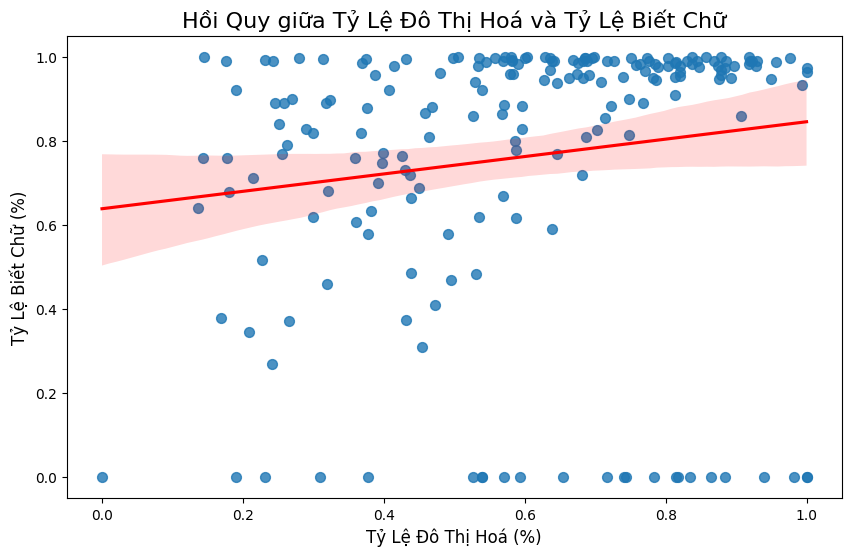

In [445]:
df["Tỷ Lệ Đô Thị Hoá (%)"] = pd.to_numeric(df["Tỷ Lệ Đô Thị Hoá (%)"], errors="coerce")
df["Tỷ Lệ Biết Chữ (%)"] = pd.to_numeric(df["Tỷ Lệ Biết Chữ (%)"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.regplot(x='Tỷ Lệ Đô Thị Hoá (%)', y='Tỷ Lệ Biết Chữ (%)', data=df, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Hồi Quy giữa Tỷ Lệ Đô Thị Hoá và Tỷ Lệ Biết Chữ', fontsize=16)
plt.xlabel('Tỷ Lệ Đô Thị Hoá (%)', fontsize=12)
plt.ylabel('Tỷ Lệ Biết Chữ (%)', fontsize=12)
plt.show()



In [446]:
print(df.columns)

Index(['STT', 'Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)',
       'Tổng Dân Số', 'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


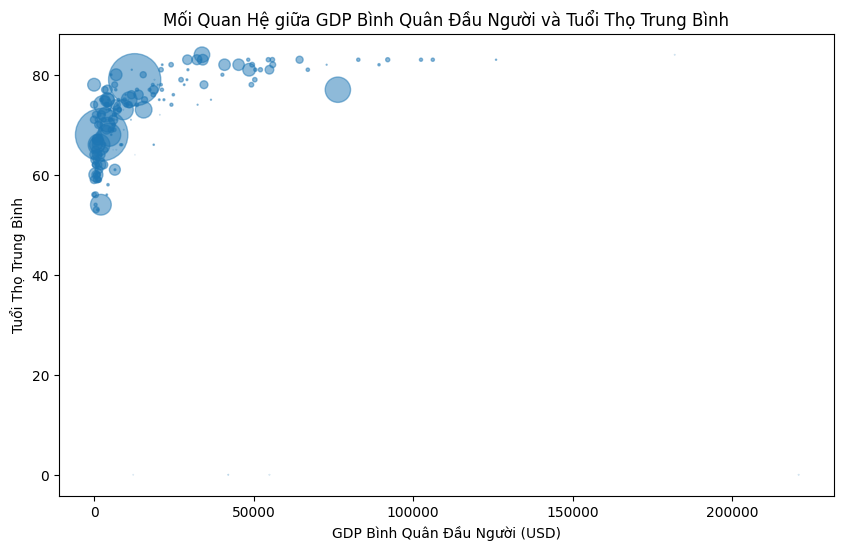

In [447]:

plt.figure(figsize=(10, 6))

bubble = plt.scatter(
    x=df["GDP Bình Quân Đầu Người (người/USD)"],
    y=df["Tuổi Thọ Trung Bình"],
    s=df["Tổng Dân Số"] / 1e6,
    alpha=0.5
)

plt.xlabel("GDP Bình Quân Đầu Người (USD)")
plt.ylabel("Tuổi Thọ Trung Bình")
plt.title("Mối Quan Hệ giữa GDP Bình Quân Đầu Người và Tuổi Thọ Trung Bình")
plt.show()



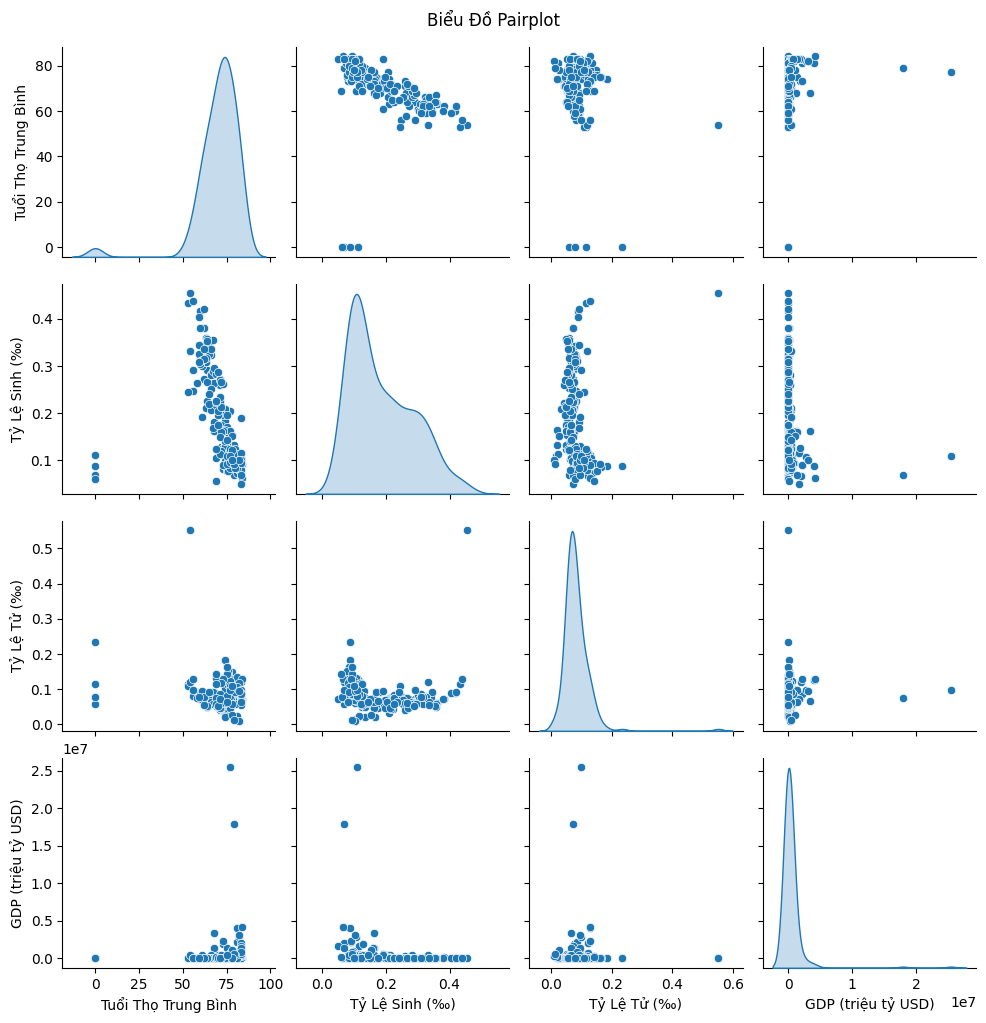

In [448]:
sns.pairplot(data=df, vars=['Tuổi Thọ Trung Bình', 'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'GDP (triệu tỷ USD)'], diag_kind="kde")
plt.suptitle("Biểu Đồ Pairplot", y=1.02)
plt.show()


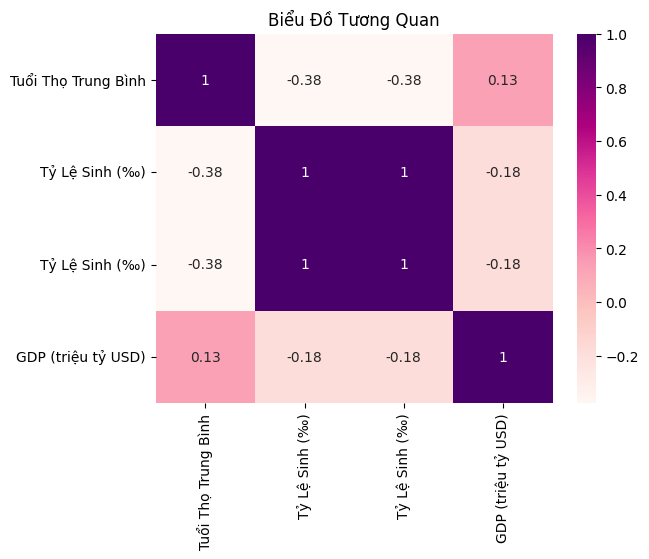

In [449]:
correlation = df[['Tuổi Thọ Trung Bình', 'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Sinh (‰)', 'GDP (triệu tỷ USD)']].corr()
sns.heatmap(correlation, annot=True, cmap="RdPu")
plt.title("Biểu Đồ Tương Quan")
plt.show()



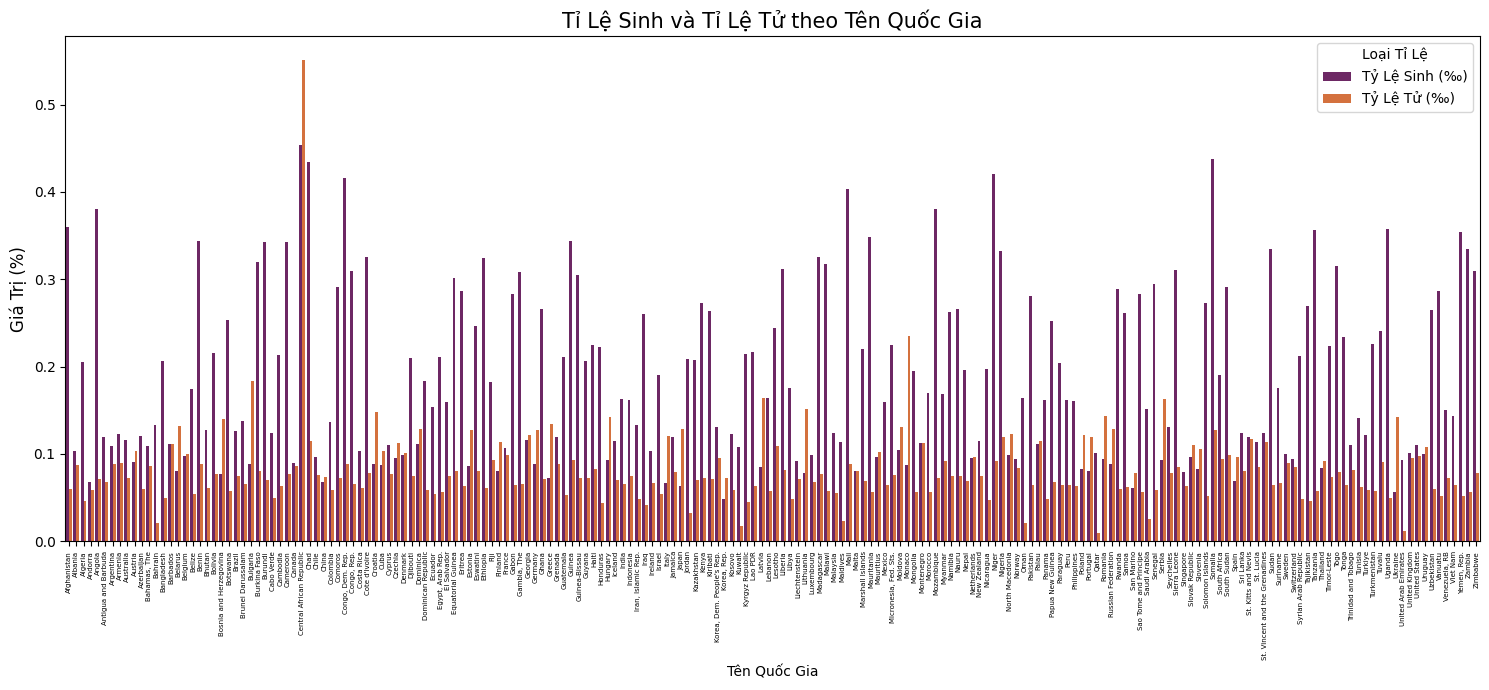

In [450]:
plt.figure(figsize=(15, 7))
df_long = df.melt(id_vars=["Tên Quốc Gia"], value_vars=["Tỷ Lệ Sinh (‰)", "Tỷ Lệ Tử (‰)"],
                  var_name="Loại Tỉ Lệ", value_name="Giá Trị (%)")

sns.barplot(x="Tên Quốc Gia", y="Giá Trị (%)", hue="Loại Tỉ Lệ", data=df_long, palette="inferno")

plt.xticks(rotation=90, fontsize=5)
plt.ylabel("Giá Trị (%)", fontsize=12)
plt.xlabel("Tên Quốc Gia", fontsize=10)
plt.title("Tỉ Lệ Sinh và Tỉ Lệ Tử theo Tên Quốc Gia", fontsize=15)
plt.legend(title="Loại Tỉ Lệ")
plt.tight_layout()

plt.show()



In [451]:
print(df.columns)

Index(['STT', 'Tên Quốc Gia', 'Thủ Đô', 'Diện Tích Lãnh Thổ (km²)',
       'Tổng Dân Số', 'Mật Độ Dân Số (người/km²)', 'Tuổi Thọ Trung Bình',
       'Tỷ Lệ Biết Chữ (%)', 'Tỷ Lệ Đô Thị Hoá (%)', 'GDP (triệu tỷ USD)',
       'GDP Bình Quân Đầu Người (người/USD)', 'Tỷ Lệ Thất Nghiệp (%)',
       'Tỷ Lệ Sinh (‰)', 'Tỷ Lệ Tử (‰)', 'Số Bang/Tỉnh',
       'Số Di Sản Văn Hoá UNESCO', 'Tổng Số Khách Đến Du Lịch (triệu người)',
       'Tổng Thu Nhập Du Lịch (tỷ USD)',
       'Chỉ Số HDI (Human Development Index)', 'Mật Độ Dân Số (người/km²))'],
      dtype='object')


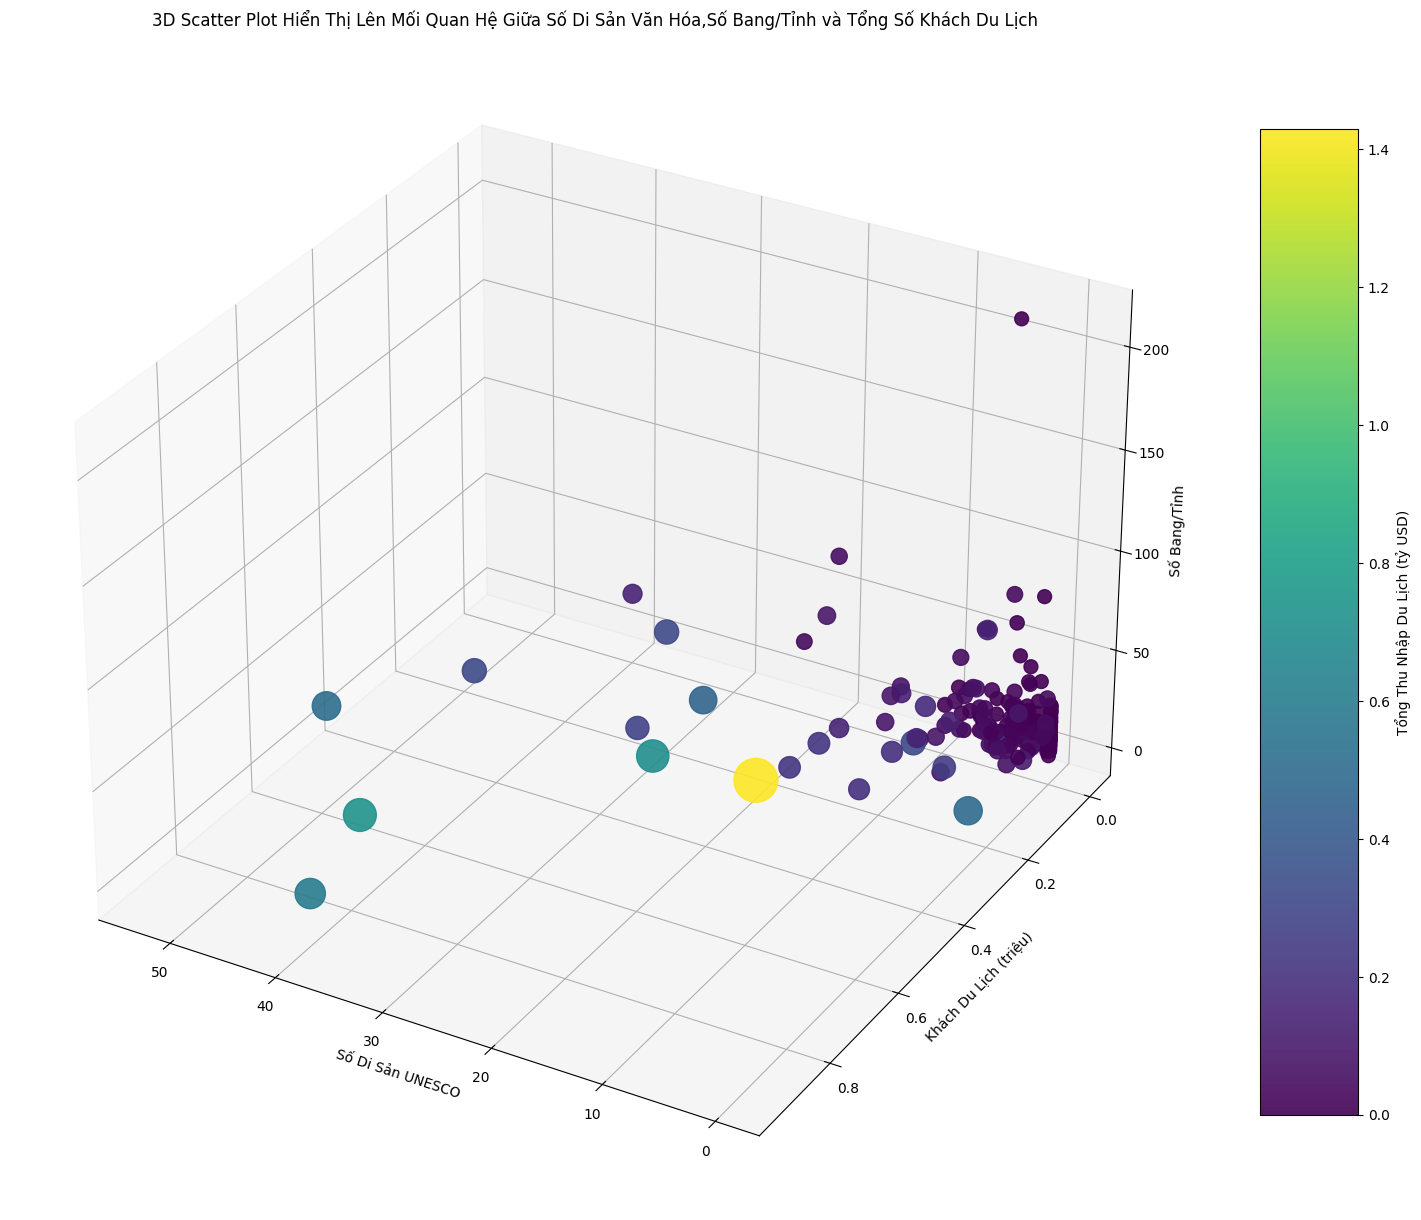

In [452]:

# Scale kích thước dot để dễ nhìn hơn
scaler = MinMaxScaler(feature_range=(100, 1000))
dot_sizes = scaler.fit_transform(df[["Tổng Thu Nhập Du Lịch (tỷ USD)"]]).flatten()

# Vẽ biểu đồ 3D
fig = plt.figure(figsize=(15,20))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    df["Số Di Sản Văn Hoá UNESCO"],
    df["Tổng Số Khách Đến Du Lịch (triệu người)"],
    df["Số Bang/Tỉnh"],
    s=dot_sizes,
    c=df["Tổng Thu Nhập Du Lịch (tỷ USD)"],
    cmap="viridis",
    alpha=0.9
)

# Gán nhãn trục và tiêu đề
ax.set_xlabel("Số Di Sản UNESCO", fontsize=10)
ax.set_ylabel("Khách Du Lịch (triệu)", fontsize=10)
ax.set_zlabel("Số Bang/Tỉnh", fontsize=10)
plt.title("3D Scatter Plot Hiển Thị Lên Mối Quan Hệ Giữa Số Di Sản Văn Hóa,Số Bang/Tỉnh và Tổng Số Khách Du Lịch ", fontsize=12)

# Thêm colorbar
cbar = plt.colorbar(sc, shrink=0.5, aspect=10)
cbar.set_label('Tổng Thu Nhập Du Lịch (tỷ USD)')

# Góc nhìn đẹp
ax.view_init(elev=30, azim=120)

plt.tight_layout()
plt.show()
